In [3]:
import cv2
import math
import array

from datetime import datetime


white = [255,255,255]
black = [0,0,0]  
red = [0, 0, 255]

def same(pixel1, pixel2):
    if len(pixel1)!= len(pixel2): return False
    for i in range(len(pixel1)):
        if pixel1[i]!=pixel2[i]: return False
    
    return True

class Position:
    x = -1
    y = -1
    
    def __init__(self, a, b):
        self.x = a
        self.y = b

    def __eq__(self, other):
        if isinstance(other, self.__class__):
            return ((self.x == other.x)and(self.y == other.y))
        else:
            return False

    def __ne__(self, other):
        return not self.__eq__(other)
    
    def dist(self, other):
        return math.sqrt((self.x-other.x)**2+(self.y-other.y)**2) 
    
class Counter:
    dist = 0
    count = 0
    
    def __init__(self, d):
        self.dist = d
        self.count = 1

    def __eq__(self, other):
        if isinstance(other, self.__class__):
            return (self.dist == other.dist)
        else:
            return False

    def __ne__(self, other):
        return not self.__eq__(other)
    
    def add(self):
        self.count += 1 
        
    def __str__(self):
        return "{}, {}".format(self.dist, self.count)
    
# current date and time
now = datetime.now()
timestamp = datetime.timestamp(now)

dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
print("date and time =", dt_string)

date and time = 18/11/2019 11:49:22


In [1]:
contour = cv2.imread("contorno.png")
mRows, mCols, mType = contour.shape

####REVER####
hist = []
brancos = []
#print(mRows)    
for i in range(mRows):
    #print (i)
    for j in range(mCols):
        if same(contour[i][j], white):
            brancos.append(Position(i,j))
#             for x in range(mRows):
#                 for y in range(mCols):
#                     if same(contour[x][y], white):
#                         d = dist(x, y, i, j)
#                         if (d > 10):
#                             hist.append(d)
print(len(brancos))
for i in range(len(brancos)-1):
    print (i)
    for j in range(i, len(brancos), 1):
        
        d = brancos[i].dist(brancos[j])
        if (d > 10):
            c = Counter(d)
            try:
                index = hist.index(c)
                hist[index].add()
                
            except ValueError:
                hist.append(Counter(d))

print (len(hist))
hist.sort(key=lambda x: x.dist, reverse=False)
indices = []
for i in range(len(hist)):
    indices.append(i)
    print (hist[i])
    
print("Done!")

NameError: name 'cv2' is not defined

In [ ]:
import matplotlib.pyplot as plt
plt.plot(indices, hist)
plt.ylabel('some numbers')
plt.show()

In [4]:
import matplotlib.pyplot as plt
def histDist(name):
    print(name)
    contour = cv2.imread(name)
    mRows, mCols, mType = contour.shape

    maxDist = int(math.sqrt(mRows**2 + mCols**2))

####REVER####
    hist = array.array('i',(0,)*maxDist)
    brancos = []
   
    for i in range(mRows):
    #print (i)
        for j in range(mCols):
            if same(contour[i][j], white):
                brancos.append(Position(i,j))

#print(len(brancos))
    for i in range(len(brancos)-1):
    #print (i)
        for j in range(i, len(brancos), 1):
        
            d = int(brancos[i].dist(brancos[j]))
            hist[d] +=1

   # print (len(hist))
#hist.sort(key=lambda x: x.dist, reverse=False)
    indices = []
    noZero = []
    for i in range(len(hist)):
        if(hist[i]!=0):
            indices.append(i)
            noZero.append(hist[i])
#             print (noZero[i])

    plt.plot(indices, noZero)
    plt.ylabel(name)
    plt.show()


contorno2.png


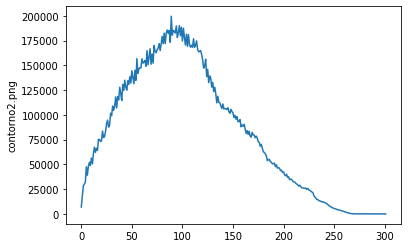

contorno3.png


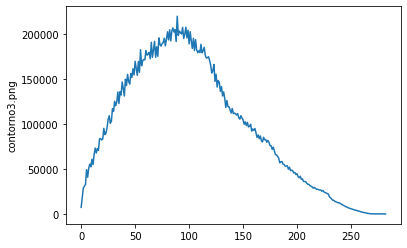

contorno4.png


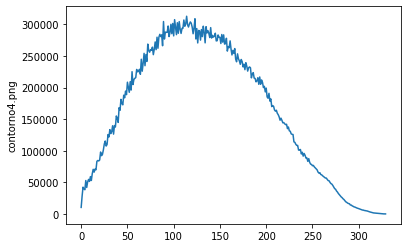

contorno5.png


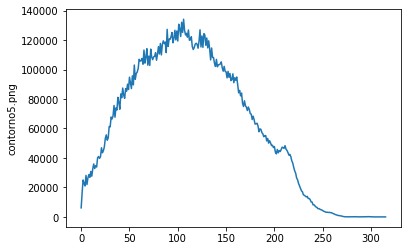

In [5]:
histDist("contorno2.png")
histDist("contorno3.png")
histDist("contorno4.png")
histDist("contorno5.png")

In [ ]:
import matplotlib.pyplot as plt
from random import randint

def drawDist(name):
    #print(name)
    contour = cv2.imread(name)
    line = contour.copy()
    mRows, mCols, mType = contour.shape

    maxDist = int(math.sqrt(mRows**2 + mCols**2))

    hist = array.array('i',(0,)*maxDist)
    brancos = []
   
    for i in range(mRows):
        for j in range(mCols):
            if same(contour[i][j], white):
                brancos.append(Position(i,j))

#     control = 0            
    for i in range(len(brancos)-1):
        r = randint(0, len(brancos)-1)
        cv2.line(line, (brancos[i].y, brancos[i].x), (brancos[r].y, brancos[r].x), red, 2)
        cv2.imshow("Lines", line)
        cv2.waitKey(10)
        line = contour.copy()
        for j in range(i, len(brancos), 1):
        
            d = int(brancos[i].dist(brancos[j]))
            hist[d] +=1
#             if (d>10)and(control<i):
#                 cv2.line(line, (brancos[i].y, brancos[i].x), (brancos[j].y, brancos[j].x), red)
#                 cv2.imshow("Lines", line)
#                 cv2.waitKey(1)
#                 line = contour.copy()
#                 control = i
            
    indices = []
    noZero = []
    for i in range(len(hist)):
        if(hist[i]!=0):
            indices.append(i)
            noZero.append(hist[i])

    plt.plot(indices, noZero)
    plt.ylabel(name)
    plt.show()
    cv2.imshow("Lines", line)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
drawDist("contorno2.png")